In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
health_data=pd.read_csv('./healthcare-dataset-stroke-data.csv')
health_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
health_data.isnull().sum().sort_values(ascending=False)

bmi                  201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

In [4]:
health_data.nunique().sort_values(ascending=False)

id                   5110
avg_glucose_level    3979
bmi                   418
age                   104
work_type               5
smoking_status          4
gender                  3
hypertension            2
heart_disease           2
ever_married            2
Residence_type          2
stroke                  2
dtype: int64

In [5]:
health_data.duplicated().sum()

0

In [6]:
health_data.drop('id',axis=1,inplace=True)

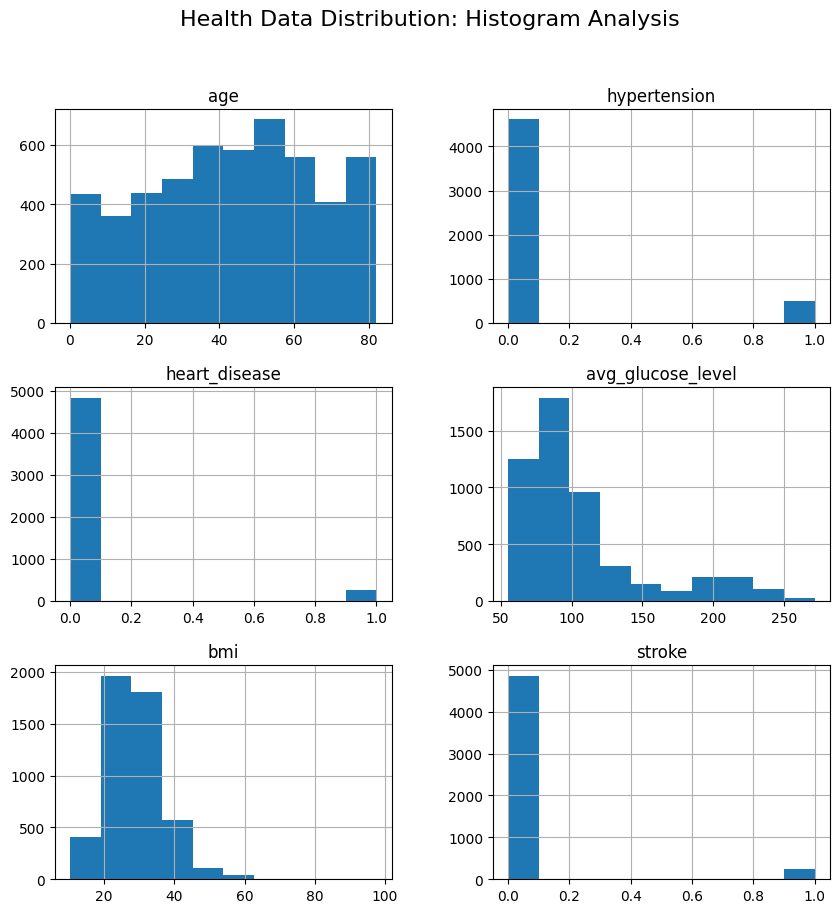

In [7]:
health_data.hist(figsize=(10,10))
plt.suptitle('Health Data Distribution: Histogram Analysis', fontsize=16)
plt.show()

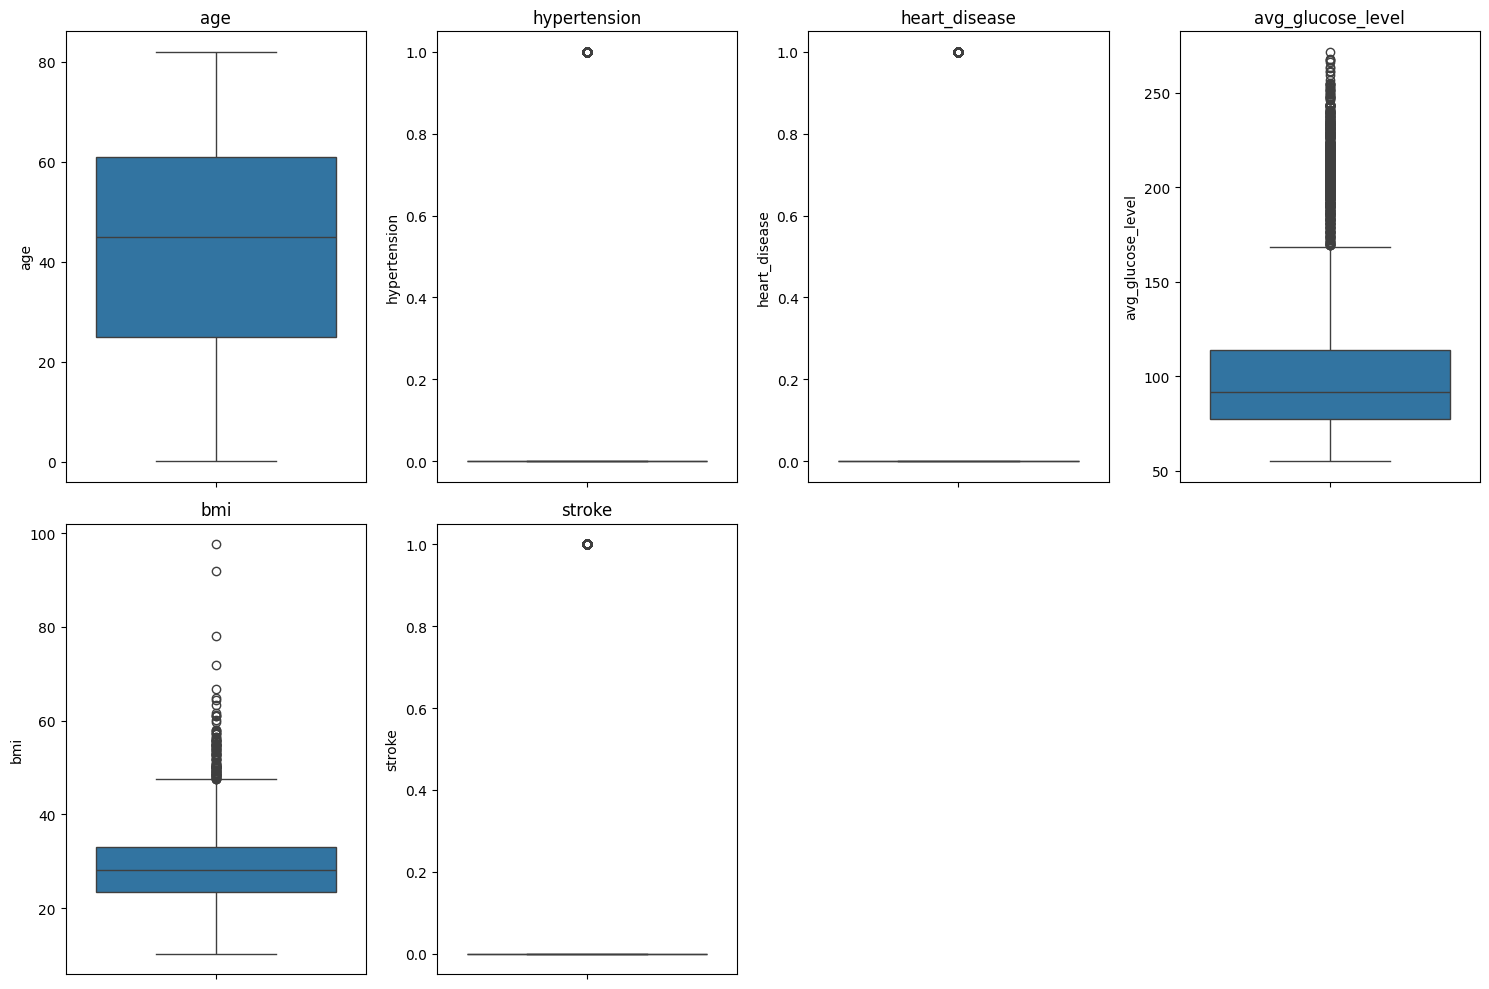

In [8]:
numerical_columns = health_data.select_dtypes(include=['int64', 'float64']).columns
n_cols = 4
n_rows = len(numerical_columns) // n_cols + 1

plt.figure(figsize=(15, 5 * n_rows))

# Plot each numerical column as a boxplot
for i, col_name in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=health_data[col_name])
    plt.title(col_name)

# Adjust the layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

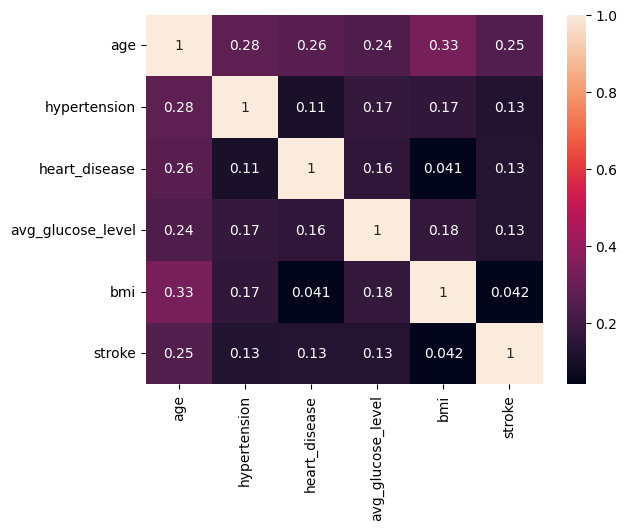

In [9]:
sns.heatmap(health_data.corr(numeric_only=True),annot=True)
plt.show()

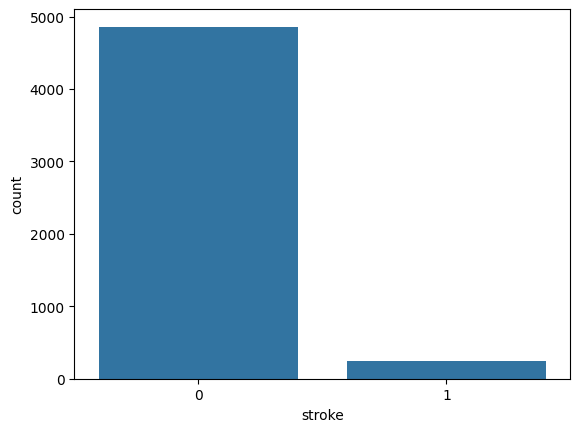

In [13]:
sns.countplot(x='stroke',data=health_data)
plt.show()

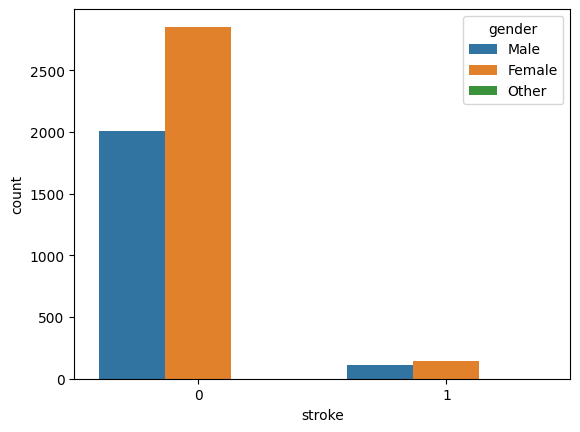

In [14]:
sns.countplot(x='stroke',hue='gender', data=health_data)
plt.show()

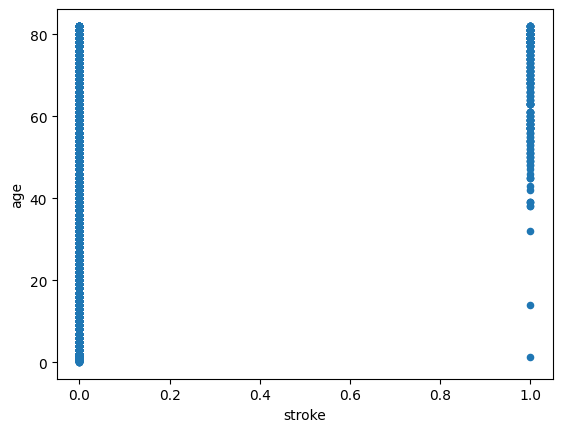

In [15]:
health_data.plot(kind='scatter',x='stroke',y='age')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

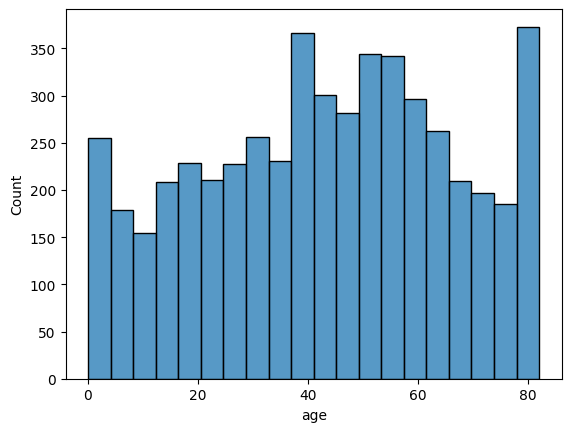

In [16]:
sns.histplot(x = 'age' ,data=health_data)

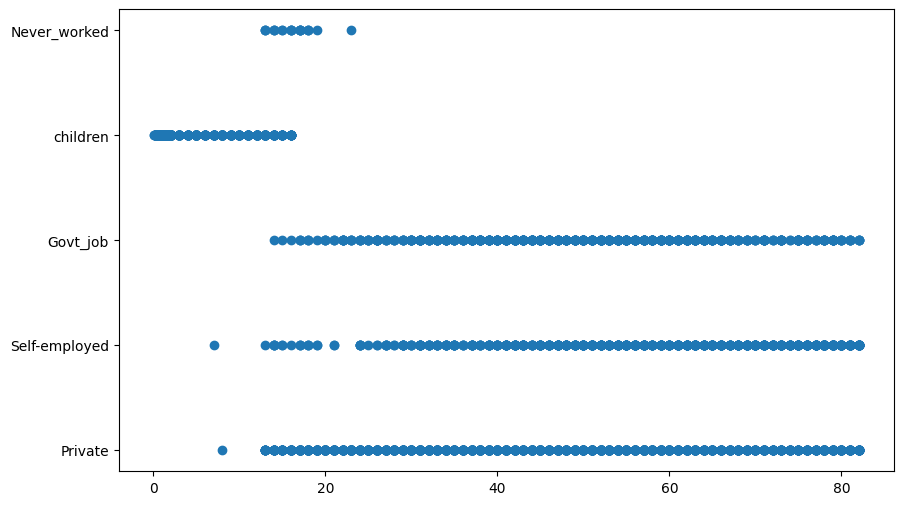

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(health_data['age'], health_data['work_type'])

<Axes: xlabel='work_type', ylabel='count'>

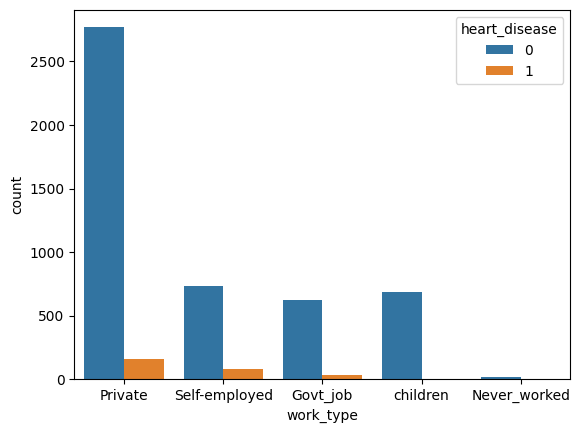

In [18]:
sns.countplot(x = 'work_type',hue='heart_disease' ,data=health_data)


<Axes: xlabel='heart_disease', ylabel='age'>

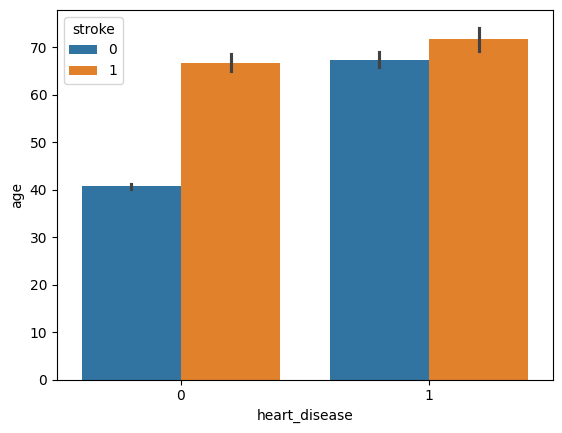

In [19]:
sns.barplot(x='heart_disease',y='age', hue='stroke' ,data=health_data)

<Axes: xlabel='Residence_type', ylabel='stroke'>

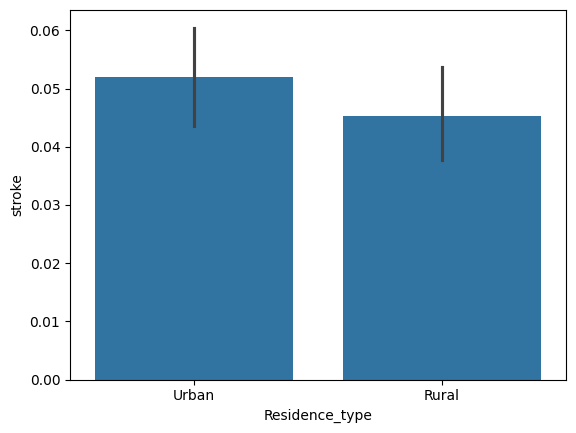

In [20]:
sns.barplot(x='Residence_type',y='stroke' ,data=health_data)

<Axes: title={'center': 'Grade'}, xlabel='stroke'>

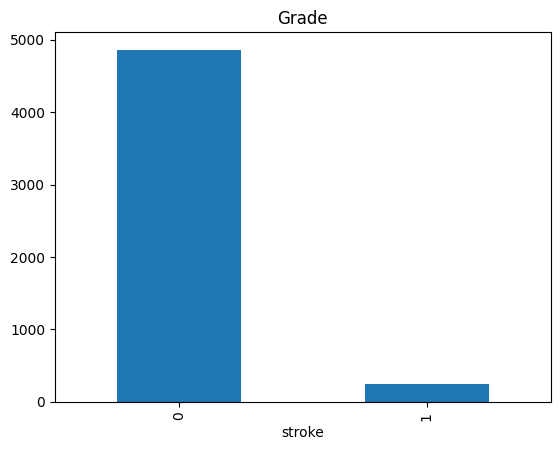

In [21]:
health_data["stroke"].value_counts().plot.bar(title="Grade")

In [22]:
from sklearn.impute import SimpleImputer
impute= SimpleImputer(missing_values=np.nan,strategy='median')

health_data['bmi']=pd.DataFrame(impute.fit_transform(np.array(health_data['bmi']).reshape(-1, 1)))
health_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [23]:
from sklearn.preprocessing import OneHotEncoder
OH=OneHotEncoder()

for col in health_data.select_dtypes(include=['object']):
  health_data[col]=OH.fit_transform(health_data[[col]]).toarray()
health_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,0.0,0.0,0.0,228.69,36.6,0.0,1
1,1.0,61.0,0,0,0.0,0.0,1.0,202.21,28.1,0.0,1
2,0.0,80.0,0,1,0.0,0.0,1.0,105.92,32.5,0.0,1
3,1.0,49.0,0,0,0.0,0.0,0.0,171.23,34.4,0.0,1
4,1.0,79.0,1,0,0.0,0.0,1.0,174.12,24.0,0.0,1


In [24]:
x=health_data.drop('stroke',axis=1)
y=health_data['stroke']

In [25]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

x_smote,y_smote=smote.fit_resample(x,y)

<Axes: >

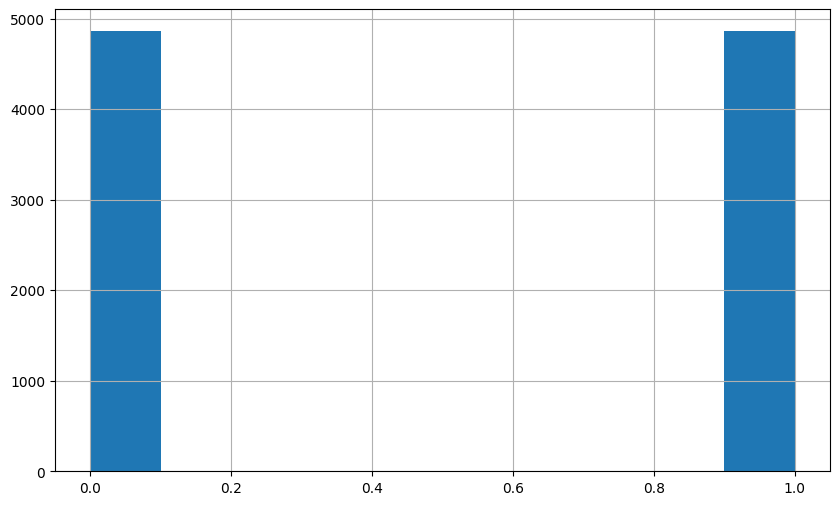

In [26]:
plt.figure(figsize=(10, 6))
y_smote.hist()

In [27]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()

x_smote=rs.fit_transform(x_smote)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

In [29]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Dictionary of models
models = {

    'LogisticRegression': LogisticRegression(max_iter = 2000),

    'RandomForestClassifier': RandomForestClassifier(),

    'KNeighborsClassifier' : KNeighborsClassifier(),

    'DecisionTreeClassifier': DecisionTreeClassifier(),

    'GaussianNB'            : GaussianNB(),

    'Support Vector Machine' : SVC() }

In [34]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Fit models, predict and calculate accuracy, precision, recall, F1 score, and ROC AUC score
results = []
models_name = []
for name, model in tqdm(models.items()):
    model.fit(X_train, y_train)
    
    # 예측값 계산
    predictions = model.predict(X_test)
    
    # ROC AUC는 확률 예측값을 필요로 하므로 predict_proba 사용
    if hasattr(model, "predict_proba"):  # predict_proba가 있는 경우
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)  # 일부 모델 (SVM 등)은 decision_function 사용
    
    # 각 지표 계산
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # 모델 이름과 결과 저장
    models_name.append(name)
    results.append([accuracy, precision, recall, f1, roc_auc])

# 결과 출력
for i, model_name in enumerate(models_name):
    print(f"Model: {model_name}")
    print(f"Accuracy: {results[i][0]}")
    print(f"Precision: {results[i][1]}")
    print(f"Recall: {results[i][2]}")
    print(f"F1 Score: {results[i][3]}")
    print(f"ROC AUC: {results[i][4]}")
    print("-" * 30)

100%|██████████| 6/6 [00:02<00:00,  2.66it/s]

Model: LogisticRegression
Accuracy: 0.7758354755784062
Precision: 0.7766570546992204
Recall: 0.7758354755784062
F1 Score: 0.775690570854747
ROC AUC: 0.8627977795400477
------------------------------
Model: RandomForestClassifier
Accuracy: 0.9712082262210797
Precision: 0.9716548526851059
Recall: 0.9712082262210797
F1 Score: 0.9712002323127642
ROC AUC: 0.993940259053661
------------------------------
Model: KNeighborsClassifier
Accuracy: 0.913624678663239
Precision: 0.9192071190809946
Recall: 0.913624678663239
F1 Score: 0.9133502252647394
ROC AUC: 0.9681395717684378
------------------------------
Model: DecisionTreeClassifier
Accuracy: 0.9362467866323907
Precision: 0.9362548410320758
Recall: 0.9362467866323907
F1 Score: 0.9362468540421808
ROC AUC: 0.9362516521279409
------------------------------
Model: GaussianNB
Accuracy: 0.7516709511568124
Precision: 0.7623354700618952
Recall: 0.7516709511568124
F1 Score: 0.7492154466405383
ROC AUC: 0.8274533439069521
------------------------------
Mo

In [35]:
Model_accuracy = pd.DataFrame(results,index=models_name,columns = ['Accuracy','Precision','Recall','F1 Score', 'Roc Auc Score'])

In [36]:
Model_accuracy

,Accuracy,Precision,Recall,F1 Score,Roc Auc Score
LogisticRegression,0.775835,0.776657,0.775835,0.775691,0.862798
RandomForestClassifier,0.971208,0.971655,0.971208,0.971200,0.993940
KNeighborsClassifier,0.913625,0.919207,0.913625,0.913350,0.968140
DecisionTreeClassifier,0.936247,0.936255,0.936247,0.936247,0.936252
GaussianNB,0.751671,0.762335,0.751671,0.749215,0.827453
Support Vector Machine,0.876093,0.877146,0.876093,0.876016,0.952263


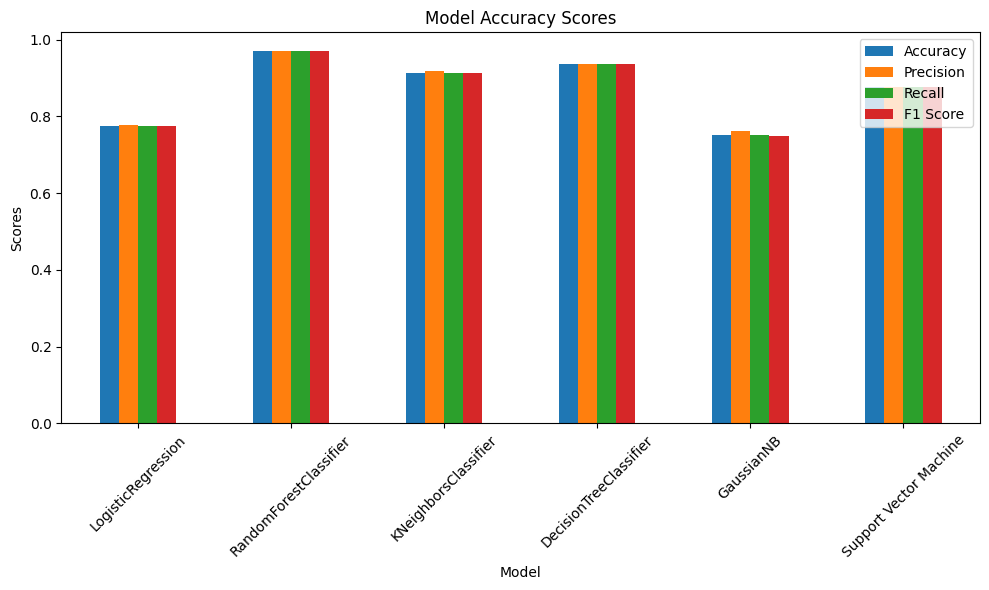

In [33]:
# Plotting
Model_accuracy.plot(kind='bar', figsize=(10, 6))

# Customizing the plot

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()